# Search Algorithm Homework - CMPE 252
#### Jesus David Montes

In [1]:
# Imports
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Load Map Data from SGB 128

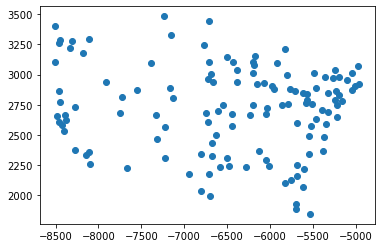

In [2]:
# XY Coordinates
x,y = np.loadtxt('sgb128_xy.txt', unpack=True) #xy coordinates
plt.scatter(x,y);

**Note:** The road distance file had a weird format, so a function was written to clean up the data

In [3]:
# Road Distances
distance_raw = np.loadtxt('sgb128_dist.txt')

In [4]:
# City Names
names = np.genfromtxt('sgb128_name.txt', dtype='str', delimiter='\n').tolist()
N = len(names) #number of nodes

## Create Network Graph

In [38]:
G = nx.Graph()
G_pos = {}

# Add Nodes
for i, name in enumerate(names):
    G.add_node(name, label='City', name=name, x_pos=x[i], y_pos=y[i])
    G_pos[name] = (x[i], y[i])

### Distance Functions

In [39]:
# Distance Function
def euclid_distance(a, b):
    return np.linalg.norm(np.array(G_pos[a])-np.array(G_pos[b]))

# Provided Distance
def road_distance(a, b):
    i = names.index(a)
    j = names.index(b)
    if j > i:
        return distance_raw[j][j-i-1]
    elif j < i:
        return distance_raw[i][i-j-1]
    else:
        return 0

### Graph Edges

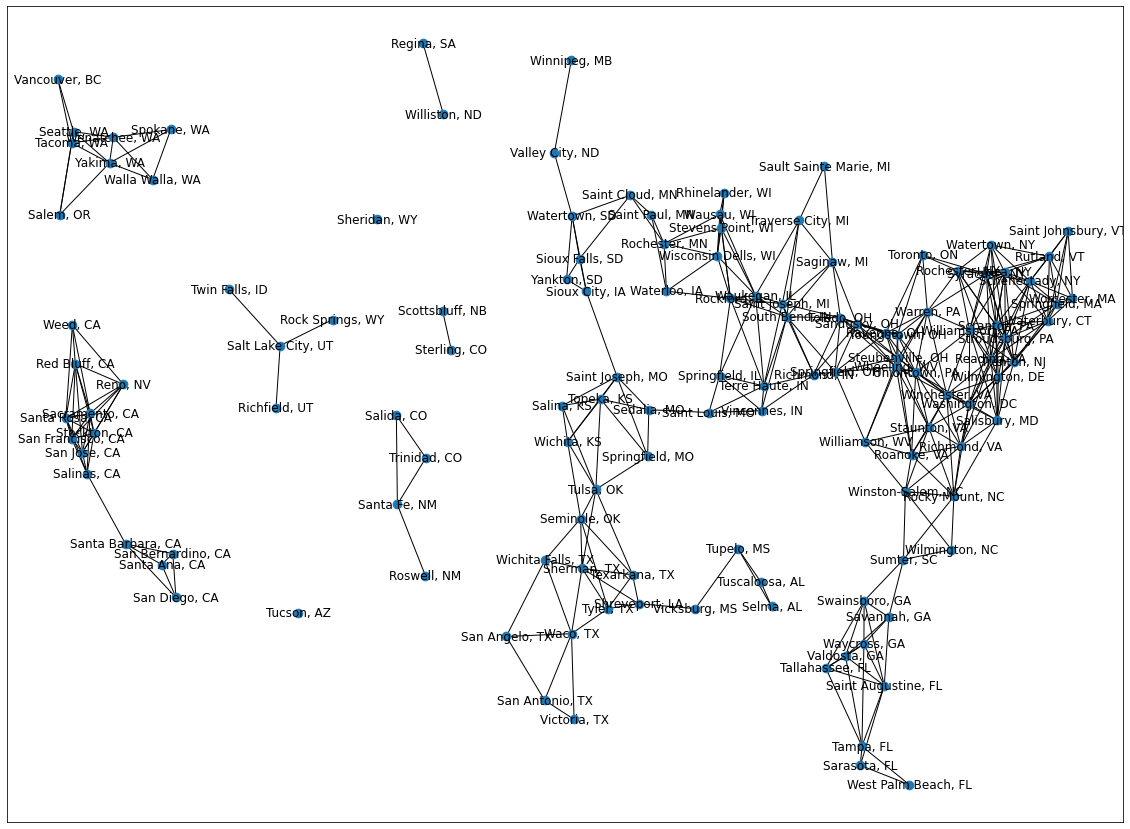

In [40]:
# Add Edges
for i, i_name in enumerate(names):
    for j, j_name in enumerate(names):
        e_dist = euclid_distance(i_name, j_name) #euclidian distance between two nodes
        if (i != j) and (e_dist <= 230):
            G.add_edge(i_name, j_name, label='ROUTE', drive=road_distance(i_name, j_name), distance=e_dist, 
                       route='{} to {}'.format(i_name, j_name))

plt.figure(figsize=(20, 15))
nx.draw_networkx(G, pos=G_pos, node_size=75)

In [41]:
nx.write_graphml(G, 'C:\\Users\\jesus\\.Neo4jDesktop\\relate-data\\dbmss\\dbms-1ea5ef78-5628-47a1-a31a-794be174cf4d\\import\\sgb128.graphml')

In [42]:
nx.write_graphml(G, 'C:\\Users\\jesus\\OneDrive\\Documents\\Jupyter\\CMPE252\\SearchAlgo\\sgb128.graphml')